In [1]:
# Imports
import data_provider as dp

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#### Hyperparameters!
symbol = 'GS'
symbol_desc = 'Goldman Sachs stock'
symbol_currency = 'USD'

train_test_cut_off = .7




## 1.0 Stock data

In [3]:
# Create a new data provider object and get stock data (Goldman Sachs)
stocks = dp.hist_stock_data([symbol])
stocks.adjClose().head()

,GS
date,
2010-01-04,153.809840
2010-01-05,156.529150
2010-01-06,154.858463
2010-01-07,157.888805
2010-01-08,154.902896


Days in dataset: 2279 Training days: 1595


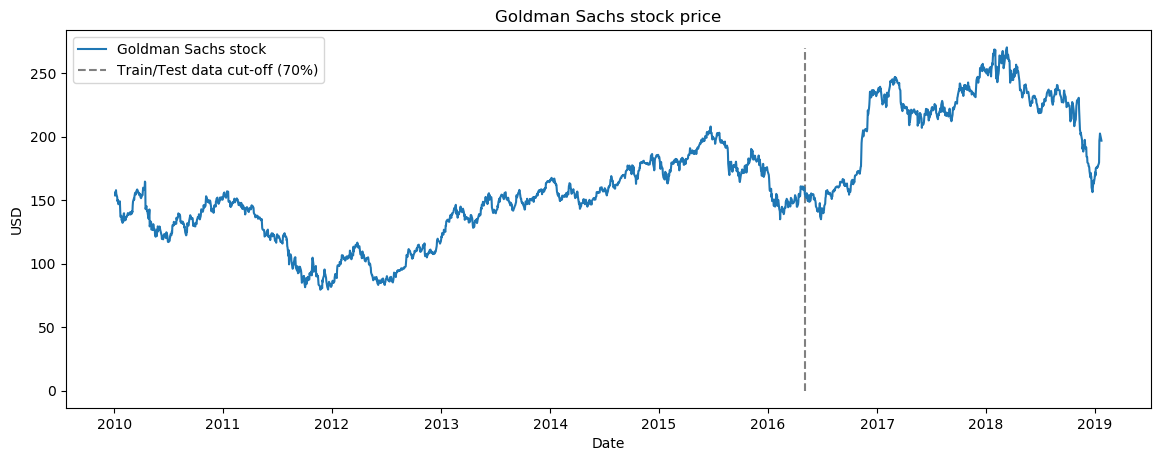

In [4]:
adjClose = stocks.adjClose().reset_index()
training_days = int(adjClose.shape[0]*train_test_cut_off)
print('Days in dataset: {} Training days: {}'.format(adjClose.shape[0], training_days))
plt.figure(figsize=(14, 5), dpi=100)
plt.plot(adjClose['date'], adjClose[symbol], label=symbol_desc)
plt.vlines(adjClose.iloc[training_days]['date'], 0, 270, linestyles='--', colors='gray', label='Train/Test data cut-off (70%)')
plt.xlabel('Date')
plt.ylabel(symbol_currency)
plt.title(symbol_desc + ' price')
plt.legend()
plt.show()

## 1.1 Technical indicators

In [5]:
indicators_grid = stocks.indicators_grid('GS', ma_rolling_windows = [7,21], bb_rolling_windows = [20], mom_rolling_windows = [20])
indicators_grid.head()

,adjClose,adjHigh,adjLow,adjOpen,adjVolume,close,divCash,high,low,open,splitFactor,volume,ma_7,ma_21,bb_up_2_20,bb_low_2_20,dr,MACD,ema,mom_20
date,,,,,,,,,,,,,,,,,,,,
2010-02-02,139.466815,139.964466,136.543113,136.543113,17246600,156.94,0.0,157.50,153.65,153.650,1.0,17246600,135.767437,145.433131,161.864472,128.164119,0.000000,0.000000,139.466815,NaN
2010-02-03,139.724527,142.132805,139.617888,140.337705,16785200,157.23,0.0,159.94,157.11,157.920,1.0,16785200,136.053078,144.762402,160.265449,128.082680,0.257712,0.005782,139.660099,NaN
2010-02-04,133.903783,138.684791,133.699390,137.982747,18895000,150.68,0.0,156.06,150.45,155.270,1.0,18895000,136.027688,143.685003,159.016066,127.236595,-5.820744,-0.173134,135.674957,NaN
2010-02-05,136.996331,137.262930,132.295302,134.023752,18759200,154.16,0.0,154.46,148.87,150.815,1.0,18759200,136.365380,142.834426,156.570315,127.593098,3.092548,-0.138609,136.566884,NaN
2010-02-08,134.277021,137.387343,134.028196,137.094084,10257300,151.10,0.0,154.60,150.82,154.270,1.0,10257300,136.087355,141.710055,154.602479,127.498347,-2.719310,-0.225139,135.034001,NaN


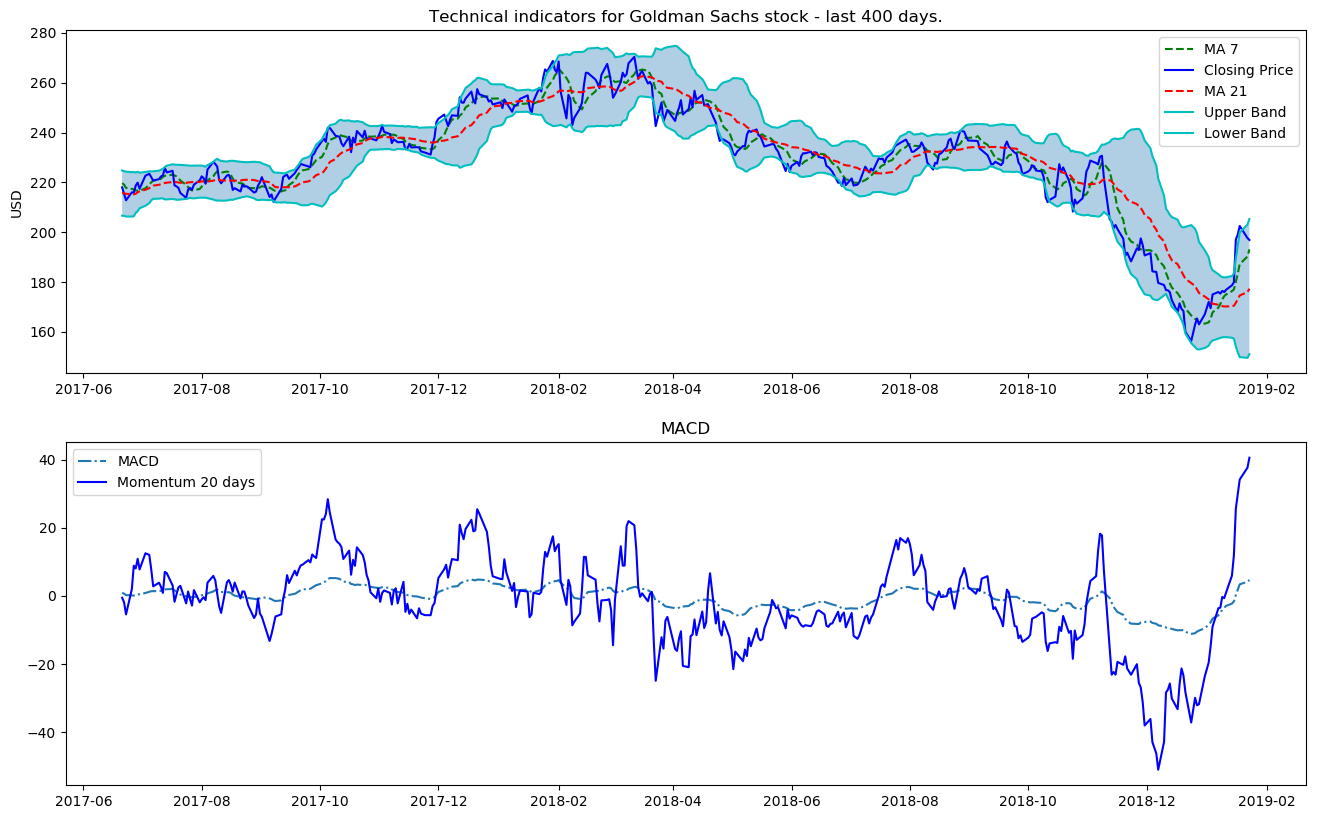

In [6]:
def plot_technical_indicators(dataset, last_days):
    plt.figure(figsize=(16, 10), dpi=100)
    
    dataset = dataset.iloc[-last_days:, :]
    x_ = range(3, dataset.shape[0])
    x_ =list(dataset.index)
    
    # Plot first subplot
    plt.subplot(2, 1, 1)
    plt.plot(dataset['ma_7'],label='MA 7', color='g',linestyle='--')
    plt.plot(dataset['adjClose'],label='Closing Price', color='b')
    plt.plot(dataset['ma_21'],label='MA 21', color='r',linestyle='--')
    plt.plot(dataset['bb_up_2_20'],label='Upper Band', color='c')
    plt.plot(dataset['bb_low_2_20'],label='Lower Band', color='c')
    plt.fill_between(x_, dataset['bb_low_2_20'], dataset['bb_up_2_20'], alpha=0.35)
    plt.title('Technical indicators for {} - last {} days.'.format(symbol_desc, last_days))
    plt.ylabel(symbol_currency)
    plt.legend()

    # Plot second subplot
    plt.subplot(2, 1, 2)
    plt.title('MACD')
    plt.plot(dataset['MACD'],label='MACD', linestyle='-.')
    plt.plot(dataset['mom_20'],label='Momentum 20 days', color='b',linestyle='-')
    plt.legend()
    
    plt.show()

plot_technical_indicators(indicators_grid, 400)